# Chi-Squared Distribution Overview

A standard normal variable, \( Z \sim N(0,1) \), when squared gives:
$$
Z^2 \sim \chi^2_{1}.
$$

More generally, if \( Z_1, Z_2, \dots, Z_k \) are independent standard normals, then:
$$
\sum_{i=1}^{k} Z_i^2 \sim \chi^2_{k},
$$
which defines the chi-squared distribution with \( k \) degrees of freedom.

**Key Properties:**
- **Non-Negative:** \( \chi^2 \) values are always \( \geq 0 \).
- **Right-Skewed:** The distribution is skewed to the right (especially for small \( k \)).
- **Mean:** $$ E[\chi^2_k] = k. $$
- **Variance:** $$ \operatorname{Var}(\chi^2_k) = 2k. $$


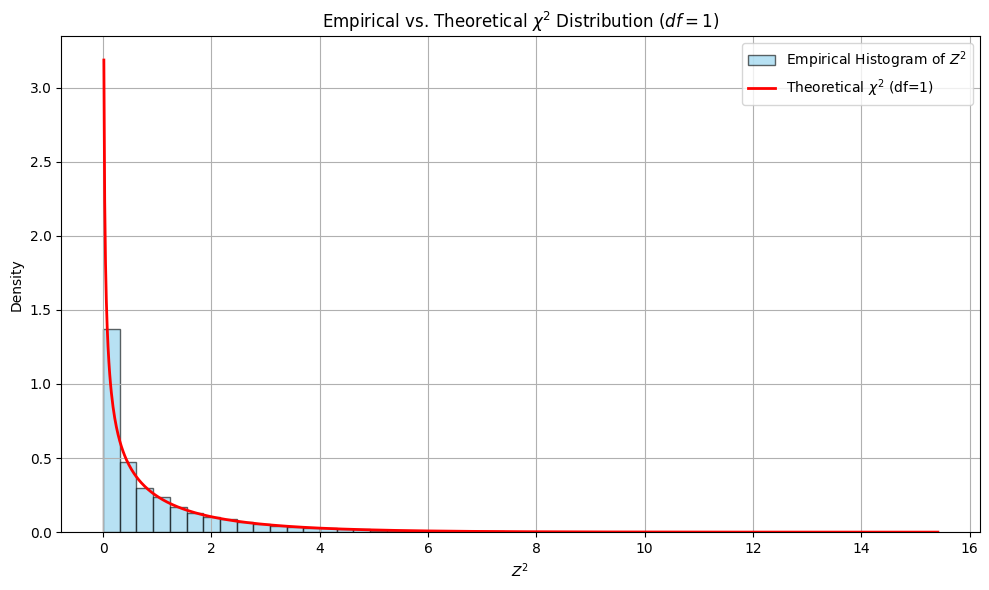

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Set a random seed for reproducibility
np.random.seed(42)

# Number of samples to generate
n_samples = 10000

# Generate Z values from a standard normal distribution: Z ~ N(0,1)
z = np.random.normal(0, 1, n_samples)

# Compute Z^2 for each sample
z_squared = z ** 2

# Create an x-grid covering the range of Z^2 values for plotting the theoretical PDF
x_vals = np.linspace(0, np.max(z_squared), 1000)

# Compute the theoretical chi-squared PDF with 1 degree of freedom
chi2_pdf = stats.chi2.pdf(x_vals, df=1)

# Plot the empirical histogram of Z^2
plt.figure(figsize=(10, 6))
plt.hist(z_squared, bins=50, density=True, alpha=0.6,
         color='skyblue', edgecolor='black', label=r'Empirical Histogram of $Z^2$')

# Overlay the theoretical chi-squared distribution curve
plt.plot(x_vals, chi2_pdf, 'r-', lw=2, label=r'Theoretical $\chi^2$ (df=1)')

# Set plot labels and title
plt.xlabel(r"$Z^2$")
plt.ylabel("Density")
plt.title(r"Empirical vs. Theoretical $\chi^2$ Distribution ($df=1$)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


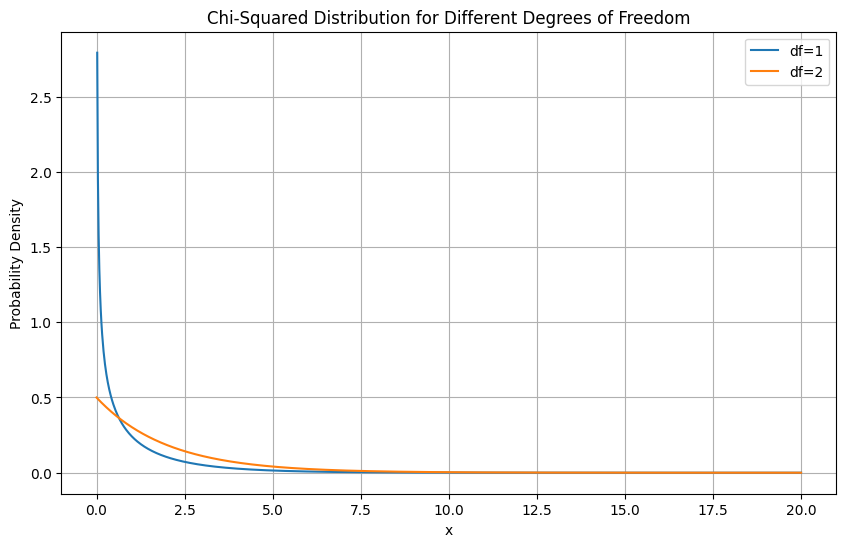

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Define degrees of freedom
df_values = [1, 2]  # Varying df to see the effect
x = np.linspace(0, 20, 1000)  # Range of x values

# Plot chi-squared distributions for different df
plt.figure(figsize=(10, 6))

for df in df_values:
    plt.plot(x, stats.chi2.pdf(x, df), label=f"df={df}")

plt.xlabel("x")
plt.ylabel("Probability Density")
plt.title("Chi-Squared Distribution for Different Degrees of Freedom")
plt.legend()
plt.grid()
plt.show()


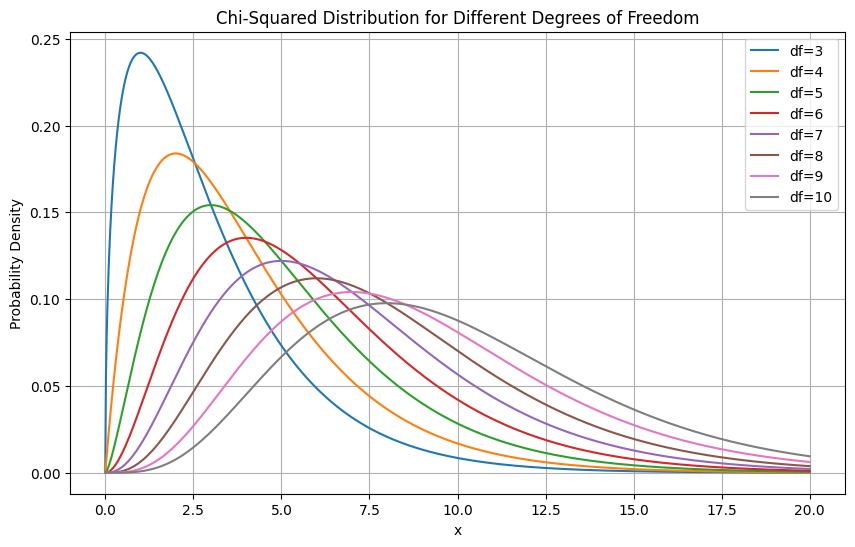

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Define degrees of freedom
df_values = [3, 4, 5, 6, 7, 8, 9, 10]  # Varying df to see the effect
x = np.linspace(0, 20, 1000)  # Range of x values

# Plot chi-squared distributions for different df
plt.figure(figsize=(10, 6))

for df in df_values:
    plt.plot(x, stats.chi2.pdf(x, df), label=f"df={df}")

plt.xlabel("x")
plt.ylabel("Probability Density")
plt.title("Chi-Squared Distribution for Different Degrees of Freedom")
plt.legend()
plt.grid()
plt.show()


# Non-Central vs. Central Chi-Squared Distributions

If \( Z_1, Z_2, \dots, Z_k \) are independent standard normal random variables, then
$$
Z_i \sim N(0,1).
$$

The sum of their squares is given by:
$$
\chi^2_k = \sum_{i=1}^k Z_i^2,
$$
which follows the **central chi-squared distribution** with \( k \) degrees of freedom.

On the other hand, if we have independent normal variables with nonzero means:
$$
X_i \sim N(\mu_i,1),
$$
then the sum
$$
\sum_{i=1}^k X_i^2
$$
follows a **non-central chi-squared distribution** with \( k \) degrees of freedom and non-centrality parameter
$$
\lambda = \sum_{i=1}^k \mu_i^2.
$$
This is denoted as:
$$
\chi'^2_k(\lambda).
$$

Notably, when the non-centrality parameter \(\lambda = 0\), the non-central chi-squared distribution reduces to the central chi-squared distribution:
$$
\chi'^2_k(0) = \chi^2_k.
$$


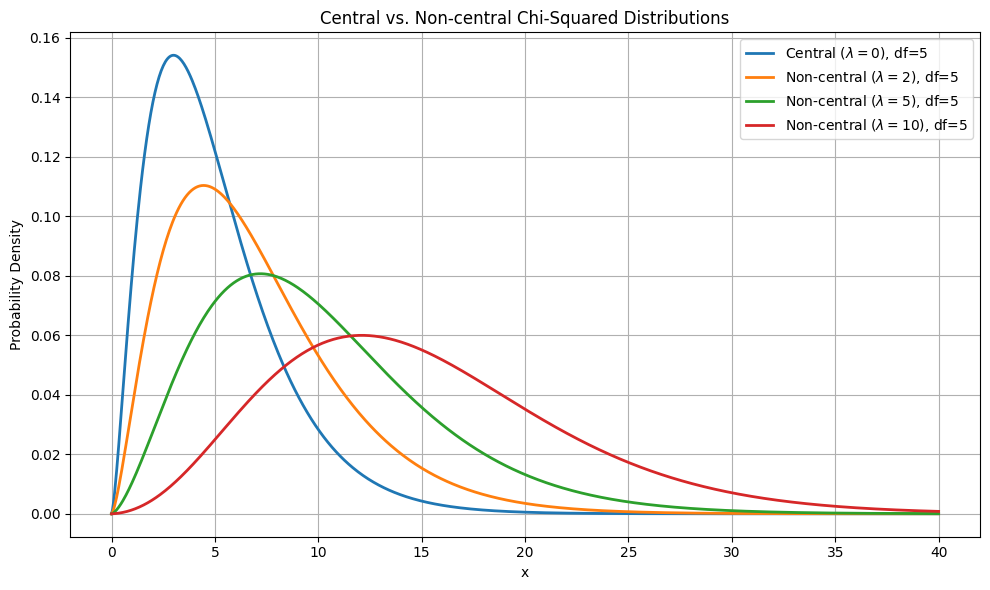

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Parameters for the chi-squared distributions
df = 5                        # degrees of freedom
nc_params = [0, 2, 5, 10]       # non-centrality parameters
# Note: nc=0 corresponds to the central chi-squared distribution

# Create an array of x values for plotting the PDF
x_vals = np.linspace(0, 40, 800)

plt.figure(figsize=(10, 6))

# Plot for each non-centrality parameter
for nc in nc_params:
    if nc == 0:
        # Central chi-squared distribution
        pdf_vals = stats.chi2.pdf(x_vals, df)
        label_str = f'Central ($\\lambda=0$), df={df}'
    else:
        # Non-central chi-squared distribution
        pdf_vals = stats.ncx2.pdf(x_vals, df, nc)
        label_str = f'Non-central ($\\lambda={nc}$), df={df}'
    
    plt.plot(x_vals, pdf_vals, lw=2, label=label_str)

plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Central vs. Non-central Chi-Squared Distributions')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
